In [1]:
#Set up DrWatson
cd("/home/jm2386/Active_Lattice/")
using DrWatson
@quickactivate "Active_Lattice"
# Load relevant fuctions
include("/home/jm2386/Active_Lattice/src/pm_pde_functions.jl");
include("/home/jm2386/Active_Lattice/src/Hetrocline.jl");
include("/home/jm2386/Active_Lattice/src/plot_functions.jl");

LoadError: LoadError: InterruptException:
in expression starting at /home/jm2386/Active_Lattice/src/pm_pde_functions.jl:1286

In [2]:
#load data 
Pe = 7.5
pert = "pm_lin"
    T = 10.0
    save_interval = 0.001
    δ  = 1e-3
    Dx = 1. 
    Dθ = 400.0
    Nx = 2^10
    Nθ = 2
    δt = 1e-7
name = "pm_pde_binodal+pert_run_δ=$(δ)_l=$(1/sqrt(Dθ))"
filename = "/store/DAMTP/jm2386/Active_Lattice/data/pde_pro/$(name)_compressed_T=20.jld2"
saves = load(filename)["saves"]

4-element Vector{Any}:
 (Dict{String, Any}("λs" => 20.0:20.0:100.0, "T" => 10.0, "video_length" => 10000.0, "save_interval" => 0.001, "max_runs" => 6, "Pe" => 7.5, "λ_step" => 10.0, "δ" => 0.001, "Nθ" => 2, "name" => "pm_pde_binodal+pert_run_δ=0.001_l=0.05"…), Any[0.0, 0.0010000999999997715, 0.002000200000000236, 0.003000299999998634, 0.00400039999999744, 0.005000500000000175, 0.00600060000000291, 0.007000700000005645, 0.008000800000006747, 0.009000900000000808  …  19.990998906297566, 19.991999006309253, 19.99299910632094, 19.993999206332628, 19.994999306344315, 19.995999406356002, 19.99699950636769, 19.997999606379377, 19.998999706391064, 19.99999980640275], Any[[0.3503877680631667 0.3504462550083689; 0.3503883284797986 0.35044564749069557; … ; 0.3503866034538067 0.3504474196177289; 0.3503871930472864 0.3504468457247934], [0.3503886039484711 0.3504477854372479; 0.35038917338916375 0.3504471839493188; … ; 0.350387421206953 0.3504489378256101; 0.3503880198803941 0.35044837007004576], [0

In [3]:
mag_lim = 0.0
rhomax  = 0.0
rhomin  = 1.0
t_max = 0.
plot_data = []
for (param, t_saves, fa_saves, fp_saves) in saves
    @unpack Nx = param
    Nt = length(t_saves)
    rhos = zeros(Nx, Nt)
    mags = zeros(Nx, Nt)

    for (i, (fa,fp)) in enumerate(zip(fa_saves,fp_saves))
        rhos[:,i] = fa[:,1]+fa[:,2]+fp
        mags[:,i] = mag_pm(fa; Nθ = Nθ)
    end

    lim = max(maximum(mags),-minimum(mags))
    vmax = maximum(rhos)
    vmin = minimum(rhos)
    mag_lim = max(mag_lim, lim)
    rhomax  = max(rhomax,vmax)
    rhomin  = min(rhomin,vmin)
    
    t_max = max(t_max, maximum(t_saves))
    push!(plot_data, (rhos,mags))
end

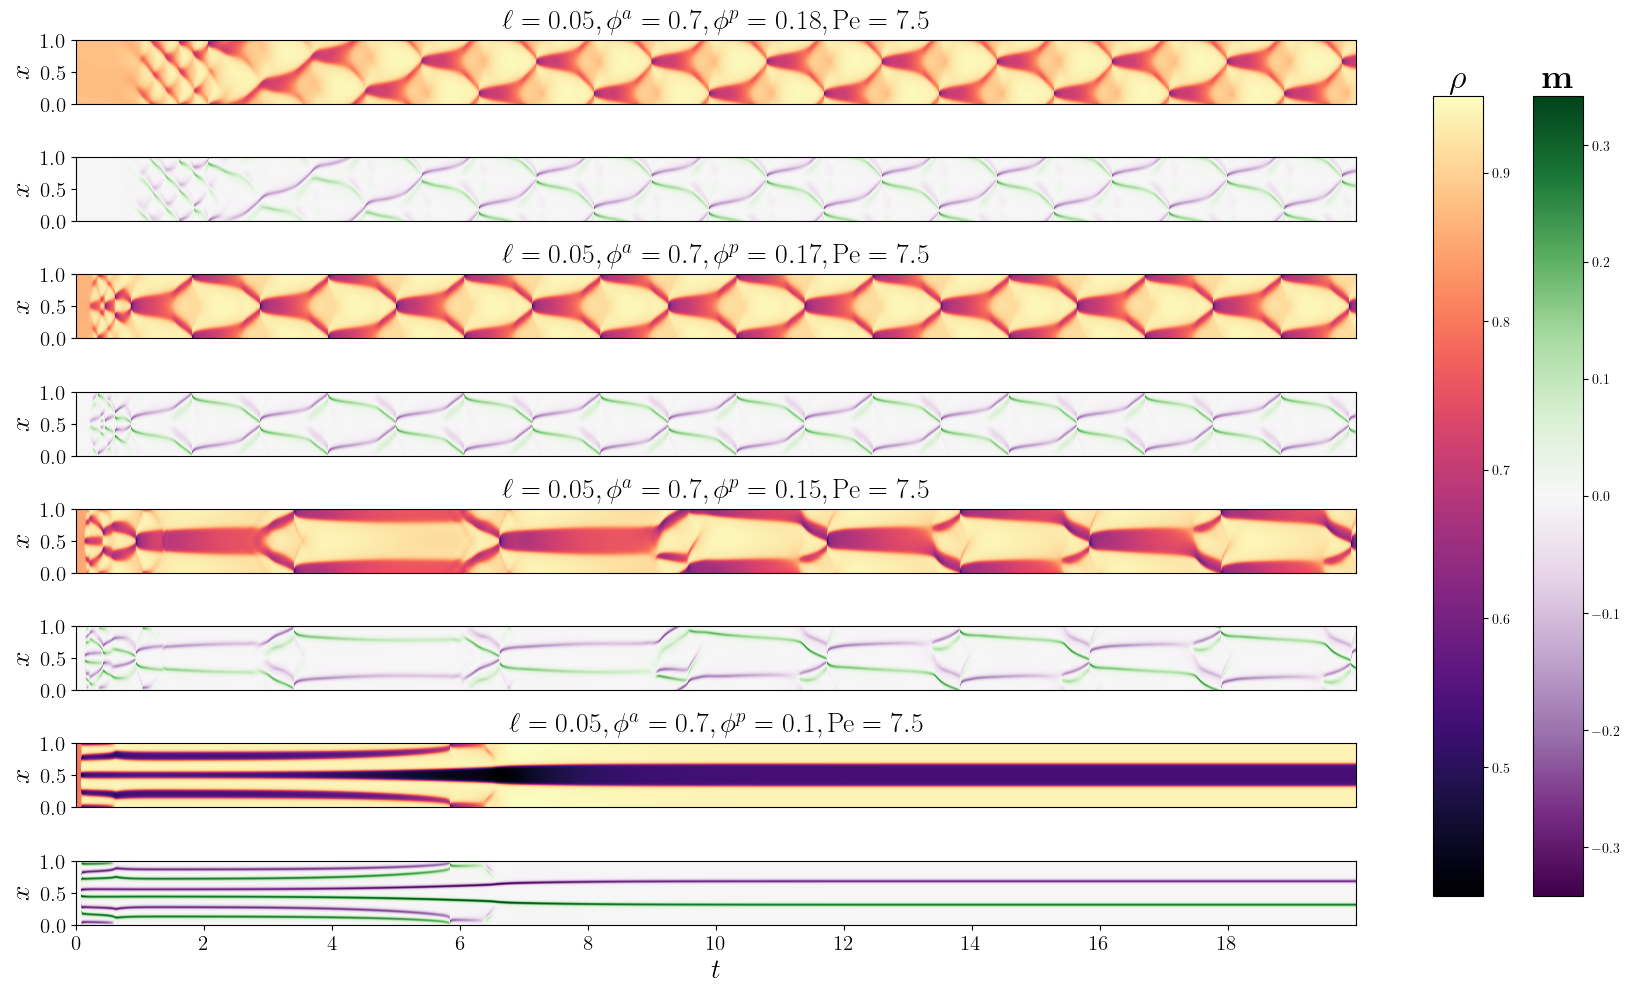

In [4]:
#create figure
using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, axs = plt.subplots(8, 1, figsize=(20,10))
i = 1
j = 1
im1 = []
im2 = []
#plot data
for ((rhos,mags),(param, t_saves, fa_saves, fp_saves)) in zip(plot_data,saves)
    ax = axs[i]
    @unpack Pe, ρa, ρp, Dθ = param
    latex_title = latexstring("\$ \\ell = $(round(1/sqrt(Dθ); digits = 2)), \\phi^a = $(ρa), \\phi^p = $(round(ρp; digits = 2)), \\mathrm{Pe} = $(round(Pe; digits = 3))\$")
    ax.set_title(latex_title,fontsize=20)
    #ax.set_aspect(t_max/16)
    colmap = PyPlot.plt.cm.magma
    norm1 = matplotlib.colors.Normalize(vmin= rhomin, vmax= rhomax) 
    im1 = ax.matshow(rhos; norm = norm1,  cmap = colmap, extent = [0., t_max, 0., 1.])
    i +=1
    #
    ax = axs[i]
    #ax.set_aspect(t_max/16)
    colmap = PyPlot.plt.cm.PRGn
    norm1 = matplotlib.colors.Normalize(vmin= -mag_lim, vmax= mag_lim) 
    im2 = ax.matshow(mags; norm = norm1,  cmap = colmap, extent = [0., t_max, 0., 1.])
    i +=1
    #
end
#format fig setting
rc("text", usetex=true)
for ax in axs
    ax.yaxis.set_ticks(0.:0.5:1.0)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_tick_params(labelsize=15)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.xaxis.tick_bottom()
    ax.set_ylabel(L"x", fontsize=20)
end
# add bottom labels
axs[8].set_xlabel(L"t",fontsize=20)
axs[8].xaxis.set_ticks(0.:2.0:18.0)
fig.tight_layout()
# add colour bars
#fig.subplots_adjust(right=0.)
    rho_cbar_ax = fig.add_axes([0.875, 0.1, 0.025, 0.8])
    rho_cbar = fig.colorbar(im1, cax=rho_cbar_ax)
    rho_cbar_ax.set_title(L"\rho",fontsize=25)
    rho_cbar.set_ticks( 0.4:0.1:1.0)

    mag_cbar_ax = fig.add_axes([0.925, 0.1, 0.025, 0.8])
    mag_cbar_ax.set_title(L"\mathbf{m}",fontsize=25)
    mag_cbar = fig.colorbar(im2, cax=mag_cbar_ax)
    mag_cbar.set_ticks((-0.3):0.1:0.3)
display(fig)
#save figure
name = "multi_plot_Pe=$(Pe)"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/active_passive_1d/$(name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/active_passive_1d/$(name)/multi_plot.pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)

In [5]:
t_max = 0.
plot_data = []
for (param, t_saves, fa_saves, fp_saves) in saves
    @unpack Nx, ρa, ρp = param
    ϕ  = ρa + ρp
    Nt = length(t_saves)

    rhos    = zeros(Nx, Nt)
    fs      = zeros(Nx,3, Nt)
    for (i, (fa,fp)) in enumerate(zip(fa_saves,fp_saves))
        rhos[:, i]  = fa[:,1]+fa[:,2]+fp
        fs[:,1:2,i] = fa
        fs[:,3,i]   = fp
    end

    f_dt    = zeros(Nt)
    dist_dt = zeros(Nt)
    
    for i in 2:Nt
        local diff, tdiff
        diff  = rhos[:,i] - rhos[:,i-1]
        tdiff = t_saves[i] - t_saves[i-1]

        fdiff = fs[:,:,i] - fs[:,:,i-1]

        f_dt[i]    = norm(fdiff /tdiff )
        dist_dt[i] = norm( diff  / tdiff )
    end

    t_max = max(t_max, maximum(t_saves))
    push!(plot_data, (f_dt,dist_dt))
end

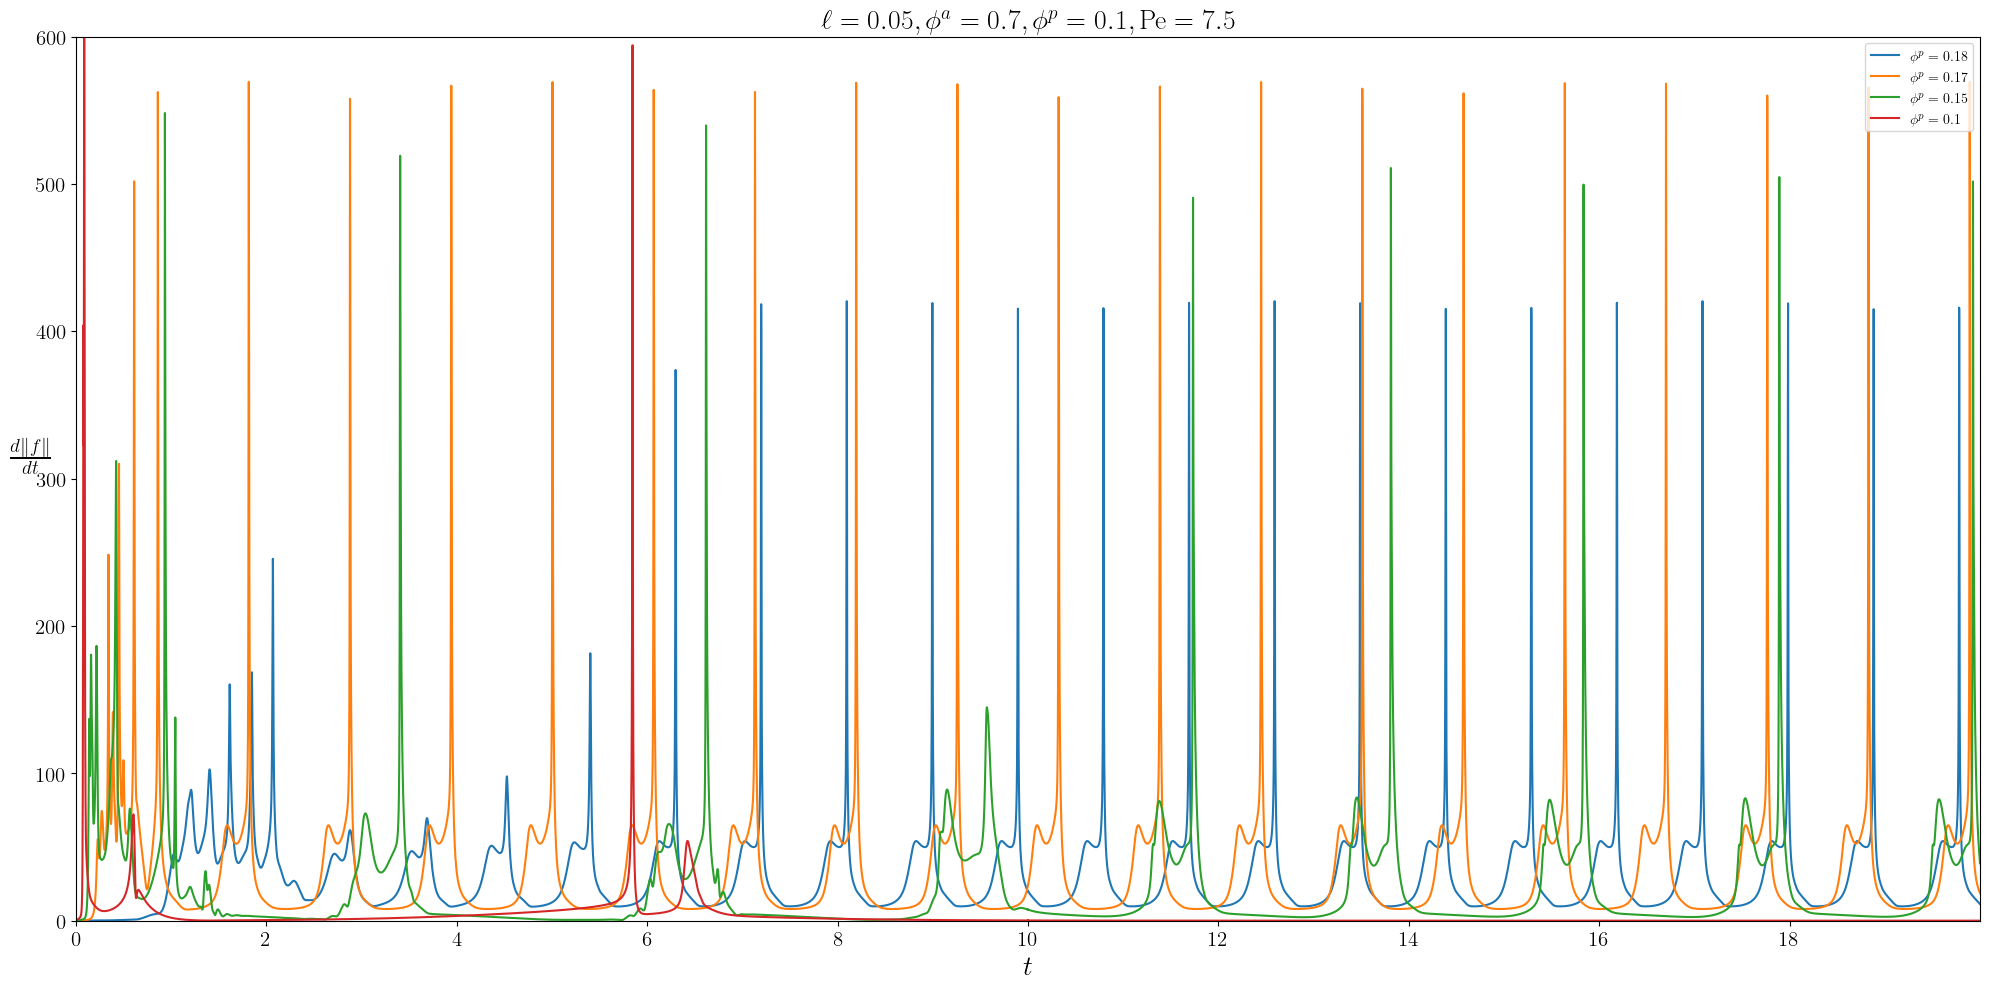

In [17]:
#create figure
using PyPlot
    PyPlot.close("all")
    rc("text", usetex=true)
    fig, ax = plt.subplots(1, 1, figsize=(20,10))
im1 = []
#plot data
for ((f_dt,dist_dt),(param, t_saves, fa_saves, fp_saves)) in zip(plot_data,saves)
    @unpack Pe, ρa, ρp, Dθ = param
    latex_title = latexstring("\$ \\ell = $(round(1/sqrt(Dθ); digits = 2)), \\phi^a = $(ρa), \\phi^p = $(round(ρp; digits = 2)), \\mathrm{Pe} = $(round(Pe; digits = 3))\$")
    ax.set_title(latex_title,fontsize=20)
    #ax.set_aspect(t_max/8)
    latex_str = latexstring("\$ \\phi^p = $(round(ρp; digits = 2)) \$")
    im1 = ax.plot(t_saves,f_dt; label = latex_str)
    #
    # ax = axs[2]
    # #ax.set_aspect(t_max/8)
    # im2 = ax.plot(t_saves,dist_dt; label = latex_str)
    # i +=1
    #
end
#format fig setting
rc("text", usetex=true)
    #ax.yaxis.set_ticks(0.:0.5:1.0)
    ax.xaxis.set_ticks([])
    ax.yaxis.set_tick_params(labelsize=15)
    ax.xaxis.set_tick_params(labelsize=15)
    ax.xaxis.tick_bottom()
    #ax.set_ylabel(L"", fontsize=20)
# add bottom labels
ax.set_ylabel(L"\frac{d \Vert f \Vert}{dt}",fontsize=20, rotation = 0)
ax.set_xlabel(L"t",fontsize=20)
ax.xaxis.set_ticks(0.:2.0:18.0)
ax.legend(loc = "upper right")
ax.axis([0.,20.,0.,600])
fig.tight_layout()
# add colour bars
display(fig)
#save figure
name = "classifier_plot_Pe=$(Pe)"
    pathname = "/store/DAMTP/jm2386/Active_Lattice/plots/active_passive_1d/$(name)";
    mkpath(pathname)
    filename = "/store/DAMTP/jm2386/Active_Lattice/plots/active_passive_1d/$(name)/classifier_plot.pdf";
    PyPlot.savefig(filename,dpi = 100, format = "pdf") #bbox_extra_artists=( ldg,)